In [8]:
%matplotlib inline
import pandas as pd 
import os

In [11]:
!dir

 Volume in drive C has no label.
 Volume Serial Number is 8689-E141

 Directory of c:\Users\jaayg\OneDrive\Escritorio\proyectos\presupuesto_general_colombia

02/08/2025  09:43 PM    <DIR>          .
02/08/2025  09:41 PM    <DIR>          ..
02/08/2025  09:41 PM    <DIR>          data
02/08/2025  09:41 PM               269 enviroment.yml
02/13/2025  05:30 PM    <DIR>          notebooks
02/08/2025  09:41 PM               140 README.md
02/13/2025  05:31 PM                22 requirements.txt
02/08/2025  09:41 PM    <DIR>          venv
               3 File(s)            431 bytes
               5 Dir(s)  64,148,492,288 bytes free


In [9]:
os.chdir('..')

In [12]:
presupuesto_general = pd.read_csv('data/processed/datos_limpios.csv')

In [13]:
presupuesto_general.head()

,Fuente de Financiación,Situacion de Fondos,Recurso Presupuestal,Codigo del Sector,Nombre del Sector,Codigo Entidad,Nombre Entidad,Apropiación Vigente,Compromisos,Obligaciones,Pagos
0,Nación,CSF,DONACIONES,29,TRABAJO,36-01-01,MINISTERIO DEL TRABAJO - GESTION GENERAL,6.916158e+09,4.083154e+09,1.187892e+09,1.187892e+09
1,Nación,CSF,DONACIONES,3,AMBIENTE Y DESARROLLO SOSTENIBLE,32-01-01,MINISTERIO DE AMBIENTE Y DESARROLLO SOSTENIBLE...,4.300000e+09,4.300000e+09,4.093660e+09,4.093660e+09
2,Nación,CSF,DONACIONES,33,"VIVIENDA, CIUDAD Y TERRITORIO",40-01-01,"MINISTERIO DE VIVIENDA, CIUDAD Y TERRITORIO - ...",1.396300e+10,0.000000e+00,0.000000e+00,0.000000e+00
3,Nación,CSF,DONACIONES,33,"VIVIENDA, CIUDAD Y TERRITORIO",40-02-00,FONDO NACIONAL DE VIVIENDA - FONVIVIENDA,1.098204e+10,0.000000e+00,0.000000e+00,0.000000e+00
4,Nación,CSF,DONACIONES,4,CULTURA,33-01-01,"MINISTERIO DE LAS CULTURAS, LAS ARTES Y LOS SA...",1.456610e+09,1.591858e+08,0.000000e+00,0.000000e+00


## Visión general del dataset.

In [14]:
presupuesto_general.columns

Index(['Fuente de Financiación', 'Situacion de Fondos', 'Recurso Presupuestal',
       'Codigo del Sector', 'Nombre del Sector', 'Codigo Entidad',
       'Nombre Entidad', 'Apropiación Vigente', 'Compromisos', 'Obligaciones',
       'Pagos'],
      dtype='object')

In [15]:
presupuesto_general.dtypes

Fuente de Financiación     object
Situacion de Fondos        object
Recurso Presupuestal       object
Codigo del Sector           int64
Nombre del Sector          object
Codigo Entidad             object
Nombre Entidad             object
Apropiación Vigente       float64
Compromisos               float64
Obligaciones              float64
Pagos                     float64
dtype: object

In [16]:
presupuesto_general.describe()

,Codigo del Sector,Apropiación Vigente,Compromisos,Obligaciones,Pagos
count,613.000000,6.130000e+02,6.130000e+02,6.130000e+02,6.130000e+02
mean,13.068515,8.213029e+11,5.414228e+11,4.638919e+11,4.609474e+11
std,9.938958,4.670013e+12,3.179830e+12,3.064054e+12,3.050499e+12
min,2.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.000000,2.943835e+09,4.592288e+08,0.000000e+00,0.000000e+00
50%,12.000000,2.970122e+10,1.460971e+10,6.299769e+09,6.231765e+09
75%,19.000000,1.774530e+11,1.266690e+11,6.993143e+10,6.899216e+10
max,36.000000,6.125810e+13,4.232480e+13,4.098120e+13,4.085970e+13


In [17]:
presupuesto_general = presupuesto_general[['Fuente de Financiación','Recurso Presupuestal','Nombre del Sector','Nombre Entidad','Apropiación Vigente', 'Compromisos', 'Obligaciones', 'Pagos']]

## Análisis unidimensional de las variables.

In [18]:
presupuesto_general['Fuente de Financiación'].unique()

array(['Nación', 'Propios'], dtype=object)

In [19]:
presupuesto_general['Recurso Presupuestal'].unique()

array(['DONACIONES', 'FONDO\xa0ESPECIAL\xa0FAZNI', 'FONDOS\xa0ESPECIALES',
       'OTROS\xa0RECURSOS\xa0DEL\xa0TESORO',
       'PRESTAMOS DESTINACIÓN ESPECIFICA',
       'RECURSOS DEL CREDITO EXTERNO PREVIA AUTORIZACION',
       'RECURSOS\xa0CORRIENTES', 'FONDO ESPECIAL DEFENSA NACIONAL',
       'RENTAS\xa0PARAFISCALES', 'INGRESOS\xa0CORRIENTES',
       'OTROS\xa0RECURSOS\xa0DE\xa0TESORERIA', 'RENTAS PARAFISCALES'],
      dtype=object)

<Axes: >

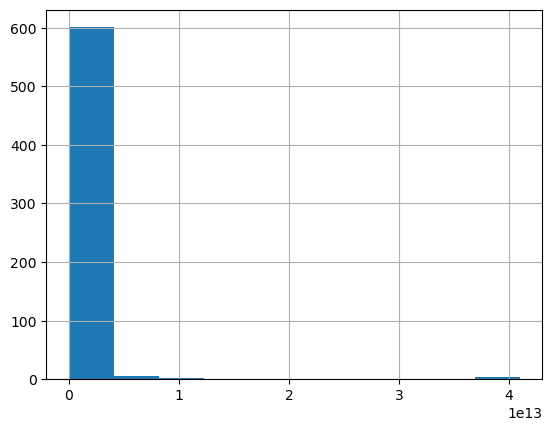

In [21]:
presupuesto_general['Obligaciones'].hist()

<Axes: >

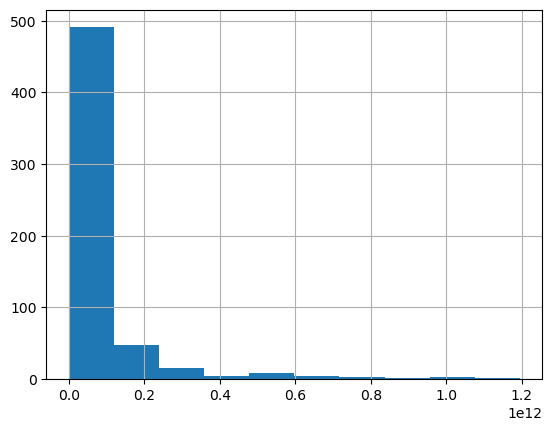

In [25]:
presupuesto_general[presupuesto_general['Obligaciones'] < presupuesto_general['Obligaciones'].quantile(0.95)]['Obligaciones'].hist()

<Axes: >

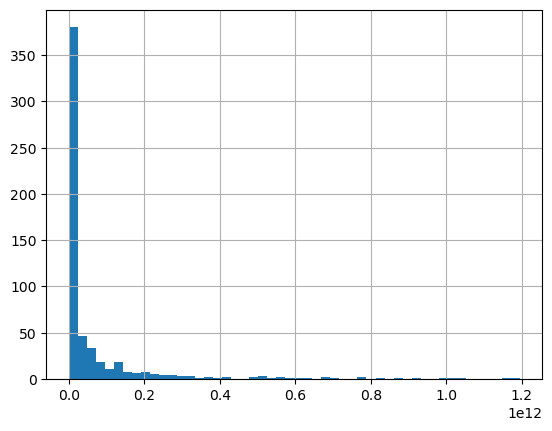

In [26]:
presupuesto_general[presupuesto_general['Obligaciones'] < presupuesto_general['Obligaciones'].quantile(0.95)]['Obligaciones'].hist(bins=50)

## Análisis multidimensional de las variables.

## Análisis de texto.